In [16]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# select stylesheet for matplotlib
plt.style.use("ggplot")

# increase number of displayed columns
pd.set_option("display.max_columns", 200)

# read csv file and store as data frame in memory
df = pd.read_csv("./datasets/forbes_2640_billionaires.csv")

# Basic Data Understanding

In [17]:
shape = df.shape
print(f"The dataset has {shape[0]} rows and {shape[1]} columns.")

The dataset has 2640 rows and 23 columns.


In [18]:
# fist 12 elements
df.head(12)

,rank,name,forbes_id,net_worth,age,age_range,country,source,industry,Age,Source of Wealth,Self-Made Score,Philanthropy Score,Residence,Citizenship,Marital Status,Children,Education,Bachelor,Master,Doctorate,Drop Out,Self Made
0,1,Bernard Arnault & family,bernard-arnault,211.0,74.0,8,France,LVMH,Fashion & Retail,74.0,LVMH,NaN,NaN,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",1.0,0.0,0.0,0.0,0
1,2,Elon Musk,elon-musk,180.0,51.0,6,United States,"Tesla, SpaceX",Automotive,52.0,"Tesla, SpaceX, Self Made",8.0,1.0,"Austin, Texas",United States,Single,10.0,"Bachelor of Arts/Science, University of Pennsy...",1.0,0.0,0.0,0.0,1
2,3,Jeff Bezos,jeff-bezos,114.0,59.0,6,United States,Amazon,Technology,59.0,"Amazon, Self Made",8.0,2.0,"Medina, Washington",United States,Engaged,4.0,"Bachelor of Arts/Science, Princeton University",1.0,0.0,0.0,0.0,1
3,4,Larry Ellison,larry-ellison,107.0,78.0,8,United States,Oracle,Technology,79.0,"Oracle, Self Made",9.0,1.0,"Lanai, Hawaii",United States,In Relationship,4.0,"Drop Out, University of Chicago; Drop Out, Uni...",0.0,0.0,0.0,1.0,1
4,5,Warren Buffett,warren-buffett,106.0,92.0,10,United States,Berkshire Hathaway,Finance & Investments,92.0,"Berkshire Hathaway, Self Made",8.0,5.0,"Omaha, Nebraska",United States,"Widowed, Remarried",3.0,"Master of Science, Columbia University; Bachel...",1.0,1.0,0.0,0.0,1
5,6,Bill Gates,bill-gates,104.0,67.0,7,United States,Microsoft,Technology,67.0,"Microsoft, Self Made",8.0,5.0,"Medina, Washington",United States,Divorced,3.0,"Drop Out, Harvard University",0.0,0.0,0.0,1.0,1
6,7,Michael Bloomberg,michael-bloomberg,94.5,81.0,9,United States,Bloomberg LP,Media & Entertainment,81.0,"Bloomberg LP, Self Made",8.0,4.0,"New York, New York",United States,In Relationship,2.0,"Master of Business Administration, Harvard Bus...",1.0,1.0,0.0,0.0,1
7,8,Carlos Slim Helu & family,carlos-slim-helu,93.0,83.0,9,Mexico,Telecom,Telecom,83.0,"Telecom, Self Made",NaN,NaN,"Mexico City, Mexico",Mexico,Widowed,6.0,"Bachelor of Arts/Science, Universidad Nacional...",1.0,0.0,0.0,0.0,1
8,9,Mukesh Ambani,mukesh-ambani,83.4,65.0,7,India,Diversified,Diversified,66.0,Diversified,NaN,NaN,"Mumbai, India",India,Married,3.0,"Drop Out, Stanford University; Bachelor of Sci...",1.0,0.0,0.0,1.0,0
9,10,Steve Ballmer,steve-ballmer,80.7,67.0,7,United States,Microsoft,Technology,67.0,"Microsoft, Self Made",6.0,2.0,"Hunts Point, Washington",United States,Married,3.0,"Bachelor of Arts/Science, Harvard University; ...",1.0,0.0,0.0,1.0,1


In [19]:
# show types for the columns
df.dtypes

rank                    int64
name                   object
forbes_id              object
net_worth             float64
age                   float64
age_range               int64
country                object
source                 object
industry               object
Age                   float64
Source of Wealth       object
Self-Made Score       float64
Philanthropy Score    float64
Residence              object
Citizenship            object
Marital Status         object
Children              float64
Education              object
Bachelor              float64
Master                float64
Doctorate             float64
Drop Out              float64
Self Made               int64
dtype: object

In [20]:
# some info about the numerical data (mean, max, min etc.)
df.describe()

,rank,net_worth,age,age_range,Age,Self-Made Score,Philanthropy Score,Children,Bachelor,Master,Doctorate,Drop Out,Self Made
count,2640.000000,2640.000000,2575.000000,2640.000000,2555.000000,558.000000,411.000000,1598.000000,1416.000000,1416.000000,1416.000000,1416.000000,2640.000000
mean,1289.159091,4.623788,65.138641,6.782955,65.457143,6.586022,1.927007,2.969337,0.686441,0.370056,0.036723,0.060028,0.686364
std,739.693726,9.834241,13.258934,1.722357,13.245204,2.644520,1.021489,1.675171,0.464103,0.482990,0.188148,0.237623,0.464058
min,1.000000,1.000000,18.000000,0.000000,19.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,659.000000,1.500000,56.000000,6.000000,56.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1312.000000,2.300000,65.000000,7.000000,66.000000,8.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1905.000000,4.200000,75.000000,8.000000,75.000000,8.000000,2.000000,4.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,2540.000000,211.000000,101.000000,11.000000,101.000000,10.000000,5.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Preparation

In [21]:
# display columns
df.columns

Index(['rank', 'name', 'forbes_id', 'net_worth', 'age', 'age_range', 'country',
       'source', 'industry', 'Age', 'Source of Wealth', 'Self-Made Score',
       'Philanthropy Score', 'Residence', 'Citizenship', 'Marital Status',
       'Children', 'Education', 'Bachelor', 'Master', 'Doctorate', 'Drop Out',
       'Self Made'],
      dtype='object')

In [22]:
# remove unnecessary columns
# 'axis=1' means columns
df = df.drop(['rank', 'age_range', 'forbes_id', 'Philanthropy Score', 'Self-Made Score', 'Source of Wealth', 'Education'], axis=1).copy()


In [23]:
df.columns

Index(['name', 'net_worth', 'age', 'country', 'source', 'industry', 'Age',
       'Residence', 'Citizenship', 'Marital Status', 'Children', 'Bachelor',
       'Master', 'Doctorate', 'Drop Out', 'Self Made'],
      dtype='object')

In [24]:
# rename columns
df = df.rename(columns={
    'Marital Status': 'marital_status',
    'Children': 'children_num',
    'Drop Out': 'drop_out',
    'Self Made': 'self_made'
}).copy()

In [25]:
# display sum of missing values for each column
df.isna().sum()

name                 0
net_worth            0
age                 65
country              0
source               0
industry             0
Age                 85
Residence           59
Citizenship         11
marital_status     551
children_num      1042
Bachelor          1224
Master            1224
Doctorate         1224
drop_out          1224
self_made            0
dtype: int64

In [29]:
# show duplicates
df.loc[df.duplicated(subset=['name'])].head()

,name,net_worth,age,country,source,industry,Age,Residence,Citizenship,marital_status,children_num,Bachelor,Master,Doctorate,drop_out,self_made
2112,Wang Yanqing & family,1.4,76.0,China,Carbon fiber products,Manufacturing,77.0,"Weihai, China",China,Widowed,NaN,NaN,NaN,NaN,NaN,0
2317,Li Li,1.2,59.0,China,Pharmaceuticals,Healthcare,59.0,"Shenzhen, China",China,Married,NaN,1.0,0.0,0.0,0.0,1


In [33]:
# invistigate duplicate
df.query('name == "Wang Yanqing & family"')

,name,net_worth,age,country,source,industry,Age,Residence,Citizenship,marital_status,children_num,Bachelor,Master,Doctorate,drop_out,self_made
785,Wang Yanqing & family,3.7,56.0,China,Electrical equipment,Manufacturing,57.0,"Wuxi, China",China,Married,NaN,NaN,NaN,NaN,NaN,1
2112,Wang Yanqing & family,1.4,76.0,China,Carbon fiber products,Manufacturing,77.0,"Weihai, China",China,Widowed,NaN,NaN,NaN,NaN,NaN,0


In [34]:
# invistigate duplicate
df.query('name == "Li Li"')

,name,net_worth,age,country,source,industry,Age,Residence,Citizenship,marital_status,children_num,Bachelor,Master,Doctorate,drop_out,self_made
1045,Li Li,2.9,57.0,China,Healthcare,Healthcare,57.0,"Changsha, China",China,NaN,NaN,NaN,NaN,NaN,NaN,1
2317,Li Li,1.2,59.0,China,Pharmaceuticals,Healthcare,59.0,"Shenzhen, China",China,Married,NaN,1.0,0.0,0.0,0.0,1


<Axes: title={'center': 'Countries with most billionares'}, xlabel='num of billionaires', ylabel='country'>

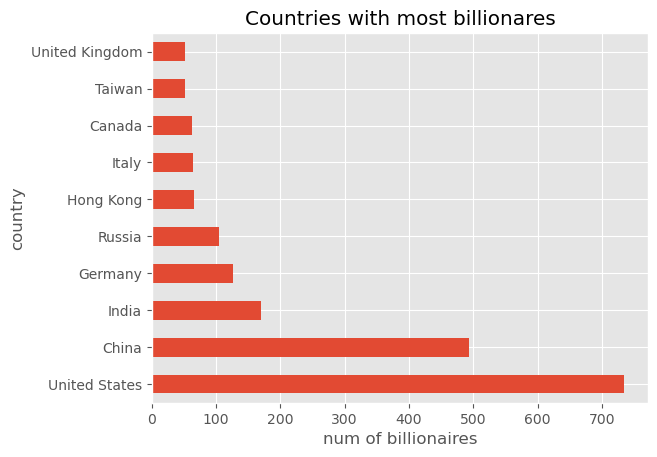

In [49]:
# save as matplotlib axis
ax = df['country'].value_counts() \
    .head(10) \
    .plot(kind='barh', title='Countries with most billionares')
ax.set_xlabel('num of billionaires')
ax.set_ylabel('country')
ax

Text(0, 0.5, 'industry')

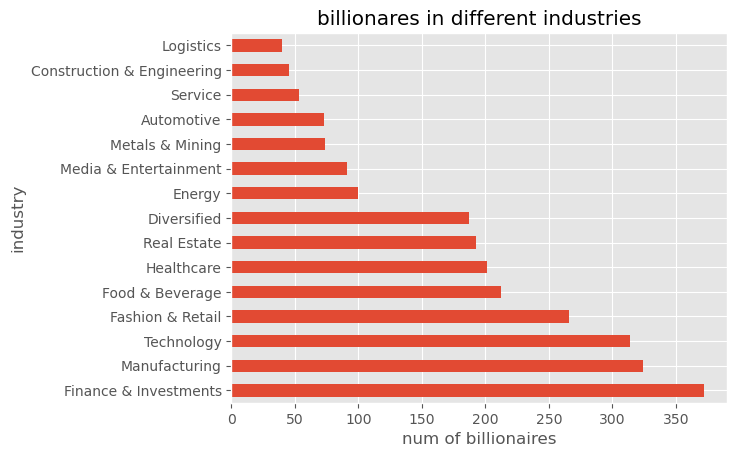

In [56]:
ax = df['industry'].value_counts() \
    .head(20) \
    .plot(kind='barh', title='billionares in different industries')
ax.set_xlabel('num of billionaires')
ax.set_ylabel('industry')

<Axes: title={'center': 'billionares marital status'}, ylabel='marital_status'>

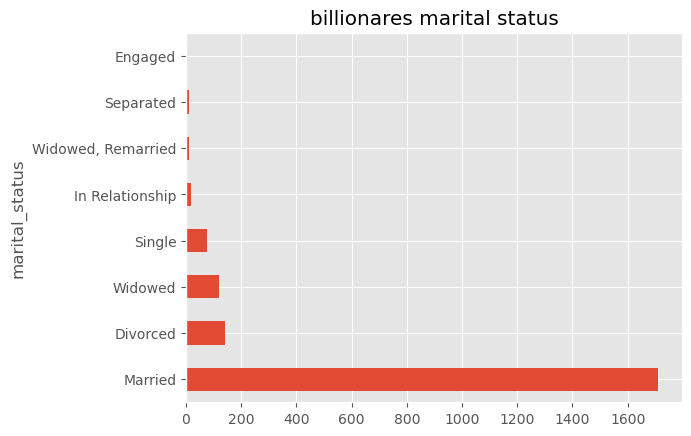

In [62]:
df['marital_status'].value_counts() \
    .plot(kind='barh', title='billionares marital status')

# Feature Relationships

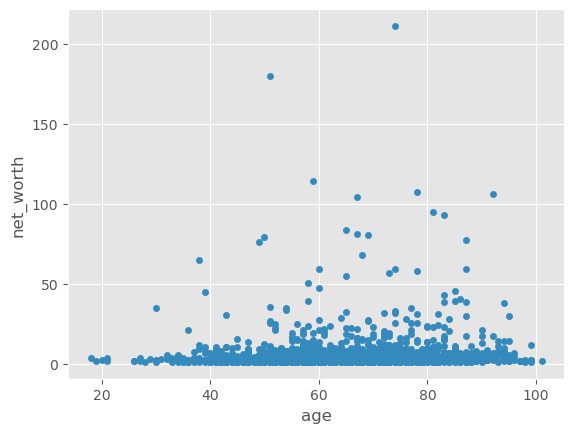

In [63]:
df.plot(kind='scatter', x='age', y='net_worth')
plt.show()